Original feature shape: (297, 13)
Features: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

Explained variance ratio for each component:
PC1: 0.357
PC2: 0.144
PC3: 0.096
PC4: 0.078
PC5: 0.072
PC6: 0.062
PC7: 0.056
PC8: 0.052
PC9: 0.033
PC10: 0.016
PC11: 0.013
PC12: 0.012
PC13: 0.009


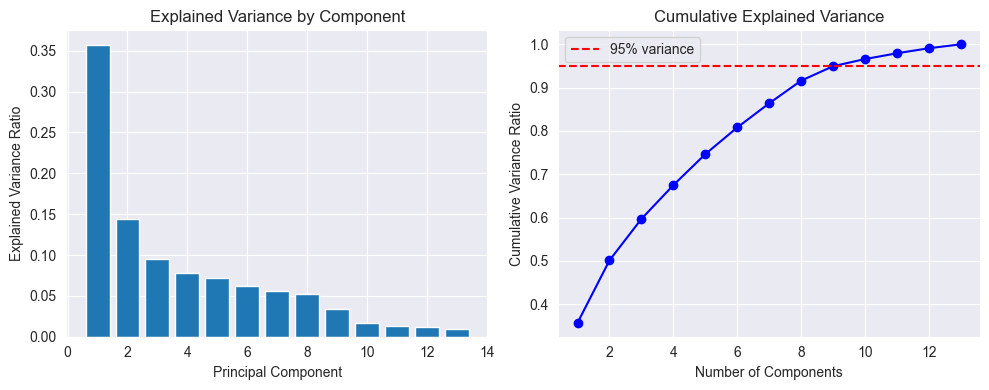


Number of components for 95% variance: 10
Reduced feature shape: (297, 10)
Variance retained: 0.966

PCA dataset preview:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  1.279197  0.318207  1.486789 -1.960230  0.908841 -0.176055  0.802147   
1  0.134200  3.935092 -0.513550 -0.077916 -0.224654 -0.523807 -0.092930   
2  3.196804  0.981072 -0.946589  0.260563  0.509258 -0.849541  0.760691   
3 -1.669810 -0.746179 -0.366793 -0.985272  1.424382  2.861405  1.042834   
4 -2.341557 -0.654753  0.488609 -0.671601  1.702824 -0.029559  0.391371   

        PC8       PC9      PC10  target  
0 -1.661405  0.452941  0.643941       0  
1  0.955816 -1.256370 -0.093620       1  
2 -0.051438  0.667539 -0.255415       1  
3  0.848801  0.481238  0.471356       0  
4  0.130267 -0.214150 -0.318005       0  


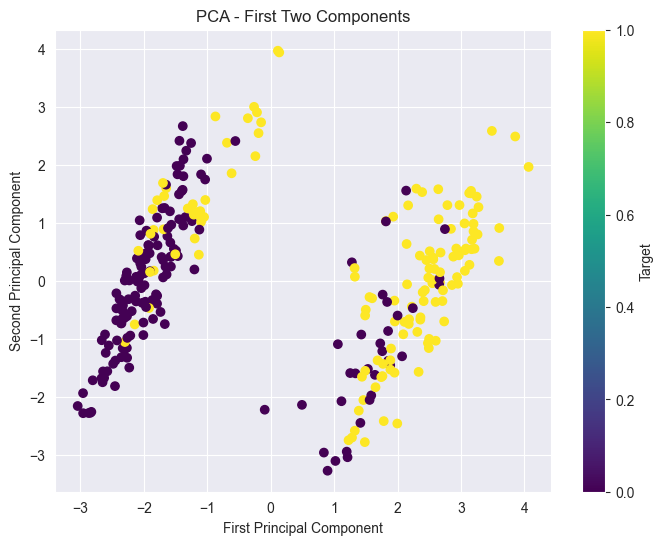


PCA-transformed data saved to ../data/processed/pca_data.csv


In [1]:
# Heart Disease UCI Dataset - PCA Analysis
# Notebook 02: Principal Component Analysis & Dimensionality Reduction

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load cleaned data
df = pd.read_csv('../data/processed/cleaned_data.csv')

# Separate features and target
X = df.drop('target', axis=1)  # Features only
y = df['target']  # Target only

print("Original feature shape:", X.shape)
print("Features:", X.columns.tolist())

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Get explained variance ratio (Example: If PC1 explains 40%, PC2 explains 25%, then cumulative is [40%, 65%, ...])
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print(f"\nExplained variance ratio for each component:")
for i, var in enumerate(explained_variance):
    print(f"PC{i + 1}: {var:.3f}")

# Plot explained variance
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.title('Explained Variance by Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')

plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'bo-')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% variance')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Ratio')
plt.legend()

plt.tight_layout()
plt.show()

# Choose number of components to retain 95% variance (This is a common threshold to keep most information while reducing dimensions)
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"\nNumber of components for 95% variance: {n_components_95}")

# Apply PCA with selected components
pca_final = PCA(n_components=n_components_95)
X_pca_final = pca_final.fit_transform(X)

print(f"Reduced feature shape: {X_pca_final.shape}")
print(f"Variance retained: {sum(pca_final.explained_variance_ratio_):.3f}")

# Create DataFrame with PCA features
pca_columns = [f'PC{i + 1}' for i in range(n_components_95)]
df_pca = pd.DataFrame(X_pca_final, columns=pca_columns)
df_pca['target'] = y.values

print("\nPCA dataset preview:")
print(df_pca.head())

# Simple scatter plot for first 2 components
if n_components_95 >= 2:
    plt.figure(figsize=(8, 6))
    plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['target'], cmap='viridis')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title('PCA - First Two Components')
    plt.colorbar(label='Target')
    plt.show()

# Save PCA-transformed data
df_pca.to_csv('../data/processed/pca_data.csv', index=False)
print(f"\nPCA-transformed data saved to ../data/processed/pca_data.csv")